In [78]:
#Loading the libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
#Load dataset

In [157]:
data=pd.read_csv("C:/Users/USER/Downloads/titanic_dataset.csv")

In [158]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [159]:
 df=data.drop("PassengerId",axis=1)

In [160]:
#check the basic details

In [161]:
df.shape

(891, 11)

In [162]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [163]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [164]:
#Missing Value Detection
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [165]:
#of 891 columns of cabin 687 are missing.so its better to drop that column entirely.

In [166]:
df.drop("Cabin",axis=1,inplace=True)

In [167]:
#now embarked is an object.so bettr fill it with the mode value

In [168]:
df["Embarked"].mode()

0    S
dtype: object

In [169]:
df["Embarked"]=df["Embarked"].fillna("S")

In [170]:
#Now Age is numerical column.So first of all lets see how it is distributed

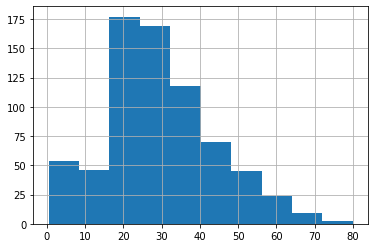

In [171]:
df["Age"].hist()
plt.show()

In [172]:
#its not like perfectelly normal.so lets not take median only for filing the age column.

In [173]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [174]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [175]:
#So all the missing values are handled

In [176]:
#Outlier Detection

In [177]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [178]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

Text(0.5, 1.0, 'Boxplot of Sibsp')

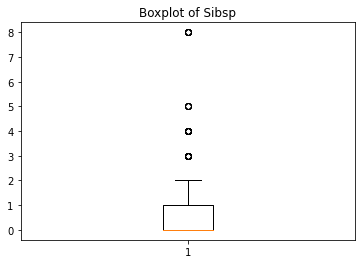

In [179]:
plt.boxplot(df["SibSp"])
plt.title("Boxplot of Sibsp")

In [180]:
Q1=np.percentile(df["SibSp"],25)
Q2=np.percentile(df["SibSp"],50)
Q3=np.percentile(df["SibSp"],75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [181]:
outliers=[]
for x in df["SibSp"]:
    if((x>UL)or(x<LL)):
        outliers.append(x)
print(outliers)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [182]:
#its not recommended to drop outlier values.

Text(0.5, 1.0, 'Boxplot of Parch')

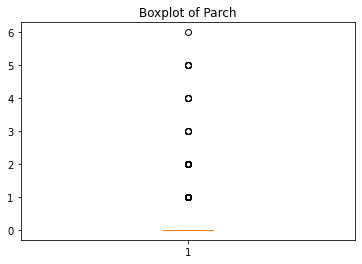

In [183]:
plt.boxplot(df["Parch"])
plt.title("Boxplot of Parch")

In [184]:
Q1=np.percentile(df["Parch"],25)
Q2=np.percentile(df["Parch"],50)
Q3=np.percentile(df["Parch"],75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [185]:
outliers=[]
for x in df["SibSp"]:
    if((x>UL)or(x<LL)):
        outliers.append(x)
print(outliers)

[1, 1, 1, 3, 1, 1, 1, 4, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 5, 1, 3, 1, 4, 2, 5, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 8, 4, 1, 4, 1, 1, 3, 8, 4, 2, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 8, 1, 1, 1, 1, 4, 1, 3, 1, 4, 1, 1, 1, 8, 1, 4, 1, 1, 1, 2, 1, 8, 1, 1, 1, 1, 1]


Text(0.5, 1.0, 'Age')

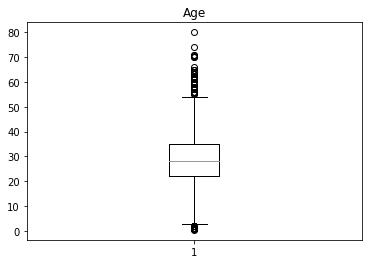

In [186]:
plt.boxplot(df["Age"])
plt.title("Age")

In [187]:
#i have done only outlier detection.and its not recomended to drop this bcoz ouliers are sometimes how the data varies truly

In [188]:
#MIn-Max Scaling

In [189]:
X=df.drop("Survived",axis=1)
y=df["Survived"]


In [190]:
X.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [191]:
X.shape

(891, 9)

In [192]:
#selecting only numercical columns for scaling
X1=X.drop(['Name','Sex','Ticket','Embarked'],axis=1)  

In [193]:
X1.shape

(891, 5)

In [194]:
X1.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [196]:

X1=scaler.fit_transform(X1)

In [197]:
type(X1)

numpy.ndarray

In [198]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [199]:
X.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],axis=1,inplace=True)

In [200]:
X1

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.34656949, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]])

In [201]:
type(X)
X1=pd.DataFrame(X1,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [209]:
ind=data["PassengerId"]

In [210]:
X=pd.concat([ind,X,X1],axis=1)


In [211]:
X.shape

(891, 15)

In [212]:
X.head(2)

,PassengerId,Name,Sex,Ticket,Embarked,Pclass,Age,SibSp,Parch,Fare,Pclass,Age,SibSp,Parch,Fare
0,1,"Braund, Mr. Owen Harris",male,A/5 21171,S,1.0,0.271174,0.125,0.0,0.014151,1.0,0.271174,0.125,0.0,0.014151
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,0.0,0.472229,0.125,0.0,0.139136,0.0,0.472229,0.125,0.0,0.139136


In [214]:
X.index

RangeIndex(start=0, stop=891, step=1)

In [217]:
X.set_index("PassengerId").head(2)#Make PassengerId as the index

,Name,Sex,Ticket,Embarked,Pclass,Age,SibSp,Parch,Fare,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S,1.0,0.271174,0.125,0.0,0.014151,1.0,0.271174,0.125,0.0,0.014151
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,0.0,0.472229,0.125,0.0,0.139136,0.0,0.472229,0.125,0.0,0.139136
